In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [4]:
sanfran_df = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')
seattle_df = pd.read_csv('seattle_incidents_summer_2014.csv')

C:\Users\Ben\Anaconda\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [10]:
sanfran_df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


In [9]:
sanfran_df['Category'].unique()

array(['ARSON', 'NON-CRIMINAL', 'LARCENY/THEFT', 'DRUG/NARCOTIC',
       'DRIVING UNDER THE INFLUENCE', 'OTHER OFFENSES', 'TRESPASS',
       'VEHICLE THEFT', 'ASSAULT', 'FRAUD', 'SUSPICIOUS OCC',
       'SECONDARY CODES', 'WEAPON LAWS', 'MISSING PERSON', 'WARRANTS',
       'ROBBERY', 'DRUNKENNESS', 'PROSTITUTION', 'LIQUOR LAWS',
       'KIDNAPPING', 'FAMILY OFFENSES', 'LOITERING', 'DISORDERLY CONDUCT',
       'FORGERY/COUNTERFEITING', 'EMBEZZLEMENT', 'BURGLARY', 'SUICIDE',
       'VANDALISM', 'STOLEN PROPERTY', 'RUNAWAY', 'GAMBLING', 'EXTORTION',
       'PORNOGRAPHY/OBSCENE MAT', 'BRIBERY'], dtype=object)

In [27]:
from datetime import datetime

## Plot crime vs time of day

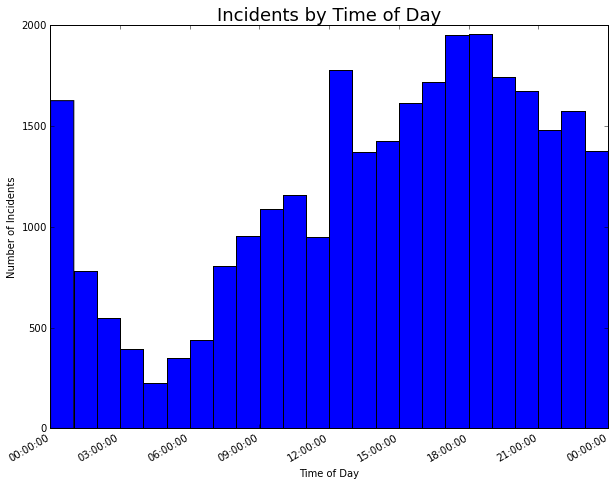

In [284]:
times = pd.to_datetime(sanfran_df.Time)
today = pd.Timestamp('00:00')
timedelta = times - today
times_ordinal = timedelta.dt.seconds/(24*60*60) + today.toordinal()
plt.figure(figsize(10,8))
ax = times_ordinal.plot(kind='hist', bins=24)
ax.xaxis_date()
plt.gcf().autofmt_xdate()
plt.title('Incidents by Time of Day', fontsize=18)
plt.ylabel('Number of Incidents')
plt.xlabel('Time of Day')

## Find the most common crime during the evening

In [61]:
evening_crimes = sanfran_df[(sanfran_df['Time'] > '16:00') & (sanfran_df['Time'] < '23:59')][['Category', 'Time']]
evening_crimes.head()

,Category,Time
0,ARSON,23:50
1,NON-CRIMINAL,23:45
2,LARCENY/THEFT,23:30
3,LARCENY/THEFT,23:30
4,NON-CRIMINAL,23:23


In [87]:
evening_crimes['Category'].value_counts()

LARCENY/THEFT                  4820
OTHER OFFENSES                 1450
ASSAULT                        1217
NON-CRIMINAL                   1119
VEHICLE THEFT                  1087
WARRANTS                        785
DRUG/NARCOTIC                   599
SUSPICIOUS OCC                  518
MISSING PERSON                  390
SECONDARY CODES                 186
WEAPON LAWS                     167
ROBBERY                         133
TRESPASS                         96
DRUNKENNESS                      76
FRAUD                            71
PROSTITUTION                     66
DRIVING UNDER THE INFLUENCE      51
KIDNAPPING                       44
RUNAWAY                          26
ARSON                            26
LIQUOR LAWS                      24
DISORDERLY CONDUCT               11
VANDALISM                         7
FORGERY/COUNTERFEITING            7
FAMILY OFFENSES                   4
STOLEN PROPERTY                   3
SUICIDE                           3
EMBEZZLEMENT                

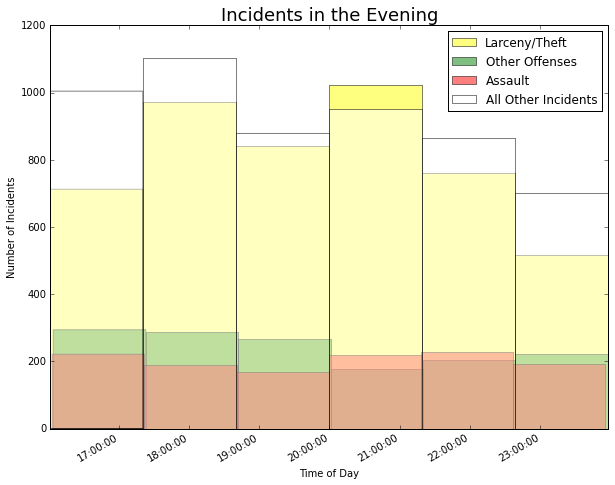

In [334]:
today = pd.Timestamp('00:00')

# All evening crimes
times = pd.to_datetime(evening_crimes.Time)
timedelta = times - today
times_ordinal = timedelta.dt.seconds/(24*60*60) + today.toordinal()

# Larceny
times = pd.to_datetime(evening_crimes[evening_crimes['Category']=='LARCENY/THEFT'].Time)
timedelta = times - today
times_ordinal_larceny = timedelta.dt.seconds/(24*60*60) + today.toordinal()

# Other
times = pd.to_datetime(evening_crimes[evening_crimes['Category']=='OTHER OFFENSES'].Time)
timedelta = times - today
times_ordinal_other = timedelta.dt.seconds/(24*60*60) + today.toordinal()

# Assault
times = pd.to_datetime(evening_crimes[evening_crimes['Category']=='ASSAULT'].Time)
timedelta = times - today
times_ordinal_assault = timedelta.dt.seconds/(24*60*60) + today.toordinal()

# Everything else
times = pd.to_datetime(evening_crimes[(evening_crimes['Category'] != 'LARCENY/THEFT') &
               (evening_crimes['Category'] != 'OTHER OFFENSES') &
               (evening_crimes['Category'] != 'ASSAULT')].Time)
timedelta = times - today
times_ordinal_else = timedelta.dt.seconds/(24*60*60) + today.toordinal()


plt.figure(figsize(10,8))
# All incidents
#ax1 = times_ordinal.plot(kind='hist', bins=6, alpha=0.5, label='All Incidents')
#ax1.xaxis_date()
# Larceny
ax2 = times_ordinal_larceny.plot(kind='hist', bins=6, color='yellow', alpha=0.5, label='Larceny/Theft')
ax2.xaxis_date()
# Other offenses
ax3 = times_ordinal_other.plot(kind='hist', bins=6, color='green', alpha=0.5, label='Other Offenses')
ax3.xaxis_date()
# Assault
ax4 = times_ordinal_assault.plot(kind='hist', bins=6, color='red', alpha=0.5, label='Assault')
ax4.xaxis_date()
# Everything else
ax4 = times_ordinal_else.plot(kind='hist', bins=6, color='white', alpha=0.5, edgecolor='black', label='All Other Incidents')
ax4.xaxis_date()

plt.gcf().autofmt_xdate()
plt.title('Incidents in the Evening', fontsize=18)
plt.ylabel('Number of Incidents')
plt.xlabel('Time of Day')
legend()

## Plot a histogram of Robbery vs time

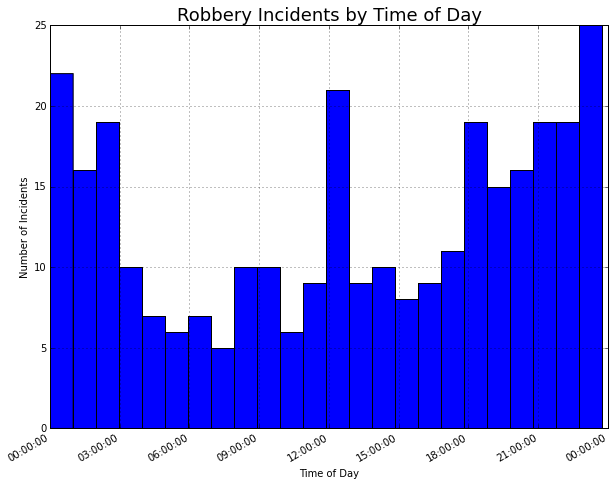

In [286]:
robbery = sanfran_df[sanfran_df['Category']=='ROBBERY']
times = pd.to_datetime(robbery.Time)
today = pd.Timestamp('00:00')
timedelta = times - today
times_ordinal = timedelta.dt.seconds/(24*60*60) + today.toordinal()
plt.figure(figsize(10,8))
ax = times_ordinal.hist(bins=24)
ax.xaxis_date()
plt.gcf().autofmt_xdate()
plt.title('Robbery Incidents by Time of Day', fontsize=18)
plt.ylabel('Number of Incidents')
plt.xlabel('Time of Day')


## How do incidents vary by neighbourhood?

In [292]:
district_counts = sanfran_df['PdDistrict'].value_counts()
districts = sanfran_df['PdDistrict'].unique()

In [293]:
index = arange(len(sanfran_df['PdDistrict'].unique()))
bar_width = 1.0

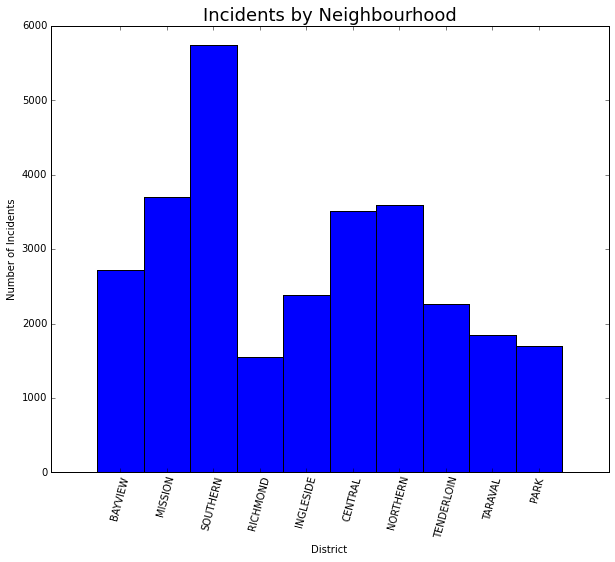

In [294]:
fig, ax = plt.subplots(figsize=(10,8))
rects = ax.bar(index + bar_width, [district_counts[i] for i in districts], bar_width)
xticks(index + bar_width + 0.5, districts, rotation=75)
title('Incidents by Neighbourhood', fontsize = 18)
ylabel('Number of Incidents')
xlabel('District')

## Most common incident in central San Francisco

In [165]:
incidents_central = sanfran_df[sanfran_df['PdDistrict']=='CENTRAL']['Category']
incidents_central.value_counts()

LARCENY/THEFT                  1574
NON-CRIMINAL                    431
OTHER OFFENSES                  326
ASSAULT                         277
WARRANTS                        162
VEHICLE THEFT                   146
SUSPICIOUS OCC                  131
DRUG/NARCOTIC                    91
MISSING PERSON                   86
PROSTITUTION                     67
TRESPASS                         52
ROBBERY                          39
FRAUD                            30
SECONDARY CODES                  29
DRUNKENNESS                      24
WEAPON LAWS                      16
KIDNAPPING                       13
DRIVING UNDER THE INFLUENCE       6
FORGERY/COUNTERFEITING            3
LIQUOR LAWS                       2
VANDALISM                         2
EMBEZZLEMENT                      2
LOITERING                         1
DISORDERLY CONDUCT                1
ARSON                             1
RUNAWAY                           1
dtype: int64

## In what areas are robberies and thefts most common?

In [174]:
rob_and_theft = sanfran_df[(sanfran_df['Category']=='LARCENY/THEFT') | (sanfran_df['Category']=='ROBBERY')]['PdDistrict']

In [176]:
rob_and_theft.value_counts()

SOUTHERN      2599
CENTRAL       1613
NORTHERN      1529
MISSION        713
INGLESIDE      592
PARK           589
TARAVAL        568
RICHMOND       536
TENDERLOIN     518
BAYVIEW        517
dtype: int64

## How do incidents vary month to month

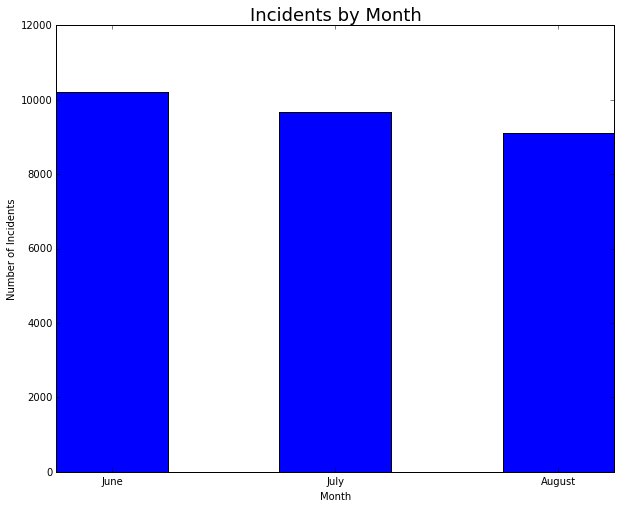

In [393]:
incidents_by_month = pd.to_datetime(sanfran_df.Date).dt.month
bar_width = 0.5
fig, ax = plt.subplots(figsize=(10,8))
rects = ax.bar(arange(5,8,1), incidents_by_month.value_counts(), bar_width)
xticks(arange(4,7,1) + bar_width + 0.75, ['June', 'July', 'August'])
title('Incidents by Month', fontsize = 18)
ylabel('Number of Incidents')
xlabel('Month')

## How do incidents correlate with eachother day to day

In [395]:
days = pd.to_datetime(sanfran_df.Date).dt.day

In [409]:
sanfran_df.groupby(by='Date')['Category'].value_counts()

Date                                   
06/01/2014  LARCENY/THEFT                   95
            ASSAULT                         39
            NON-CRIMINAL                    32
            OTHER OFFENSES                  26
            VEHICLE THEFT                   19
            WARRANTS                        17
            MISSING PERSON                  12
            SUSPICIOUS OCC                  10
            TRESPASS                         6
            ROBBERY                          5
            FRAUD                            5
            SECONDARY CODES                  3
            WEAPON LAWS                      3
            PROSTITUTION                     2
            DISORDERLY CONDUCT               2
            RUNAWAY                          2
            KIDNAPPING                       2
            EMBEZZLEMENT                     1
            DRUG/NARCOTIC                    1
            LIQUOR LAWS                      1
            ARSON   

In [410]:
date_sorted = sanfran_df.groupby(by='Date')

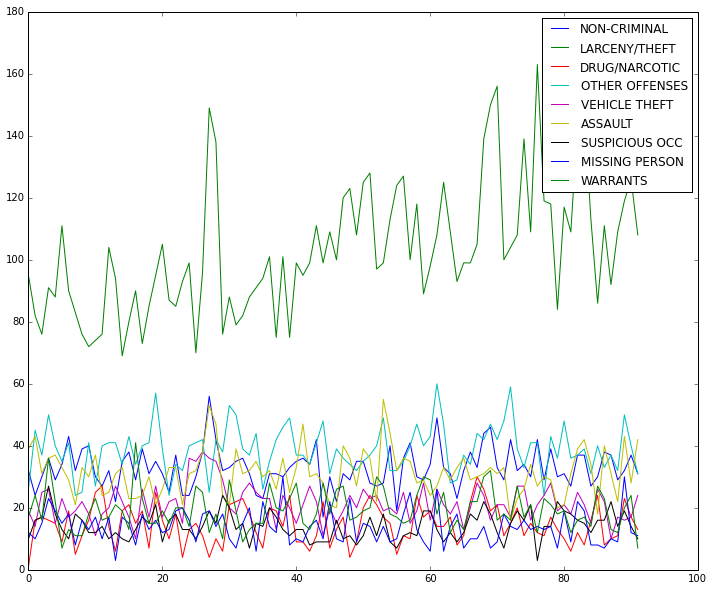

In [438]:
incident_types = sanfran_df['Category'].unique()

fig, ax = subplots(figsize=(12,10))
for i in incident_types:
    counts = sanfran_df[sanfran_df['Category']==i].groupby(by='Date')['Date'].count()
    if(sum(counts) >600):
        plot(counts, label=i)
legend()